In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

/var/folders/7t/860dclk54774ltwycrvfp7nc0000gn/T/ipykernel_16456/1372747608.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [43]:
df_x = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/fill_10398.csv')
#df_y = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/y_corrected.csv')
df = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/pbpb/fill_10398.csv')
#convert TS to datetime and set it as index
df['TS'] = pd.to_datetime(df['TS'])
df.set_index('TS', inplace=True)
df_x['TS'] = pd.to_datetime(df_x['TS'])
df_x.set_index('TS', inplace=True)
#df_y['TS'] = pd.to_datetime(df_y['TS'])
#df_y.set_index('TS', inplace=True)
#seleziona solo colonne che iniziano per M
df = df.loc[:, df.columns.str.startswith('M')]
#sostituisci i valori >1 con Nan
df = df.where(df<1)
#rimuovi colonne con tutti Nan
df = df.dropna(axis=1, how='all')
#rimuovi righe con tutti Nan
df = df.dropna(axis=0, how='all')
#ffil
df = df.ffill()
#bfill
df = df.bfill()
#merge dataset together
df = df.merge(df_x, left_index=True, right_index=True)
#df = df.merge(df_y, left_index=True, right_index=True)

In [44]:
df = df.between_time('16:18', '17:30')

In [28]:
df = df.iloc[0:20]

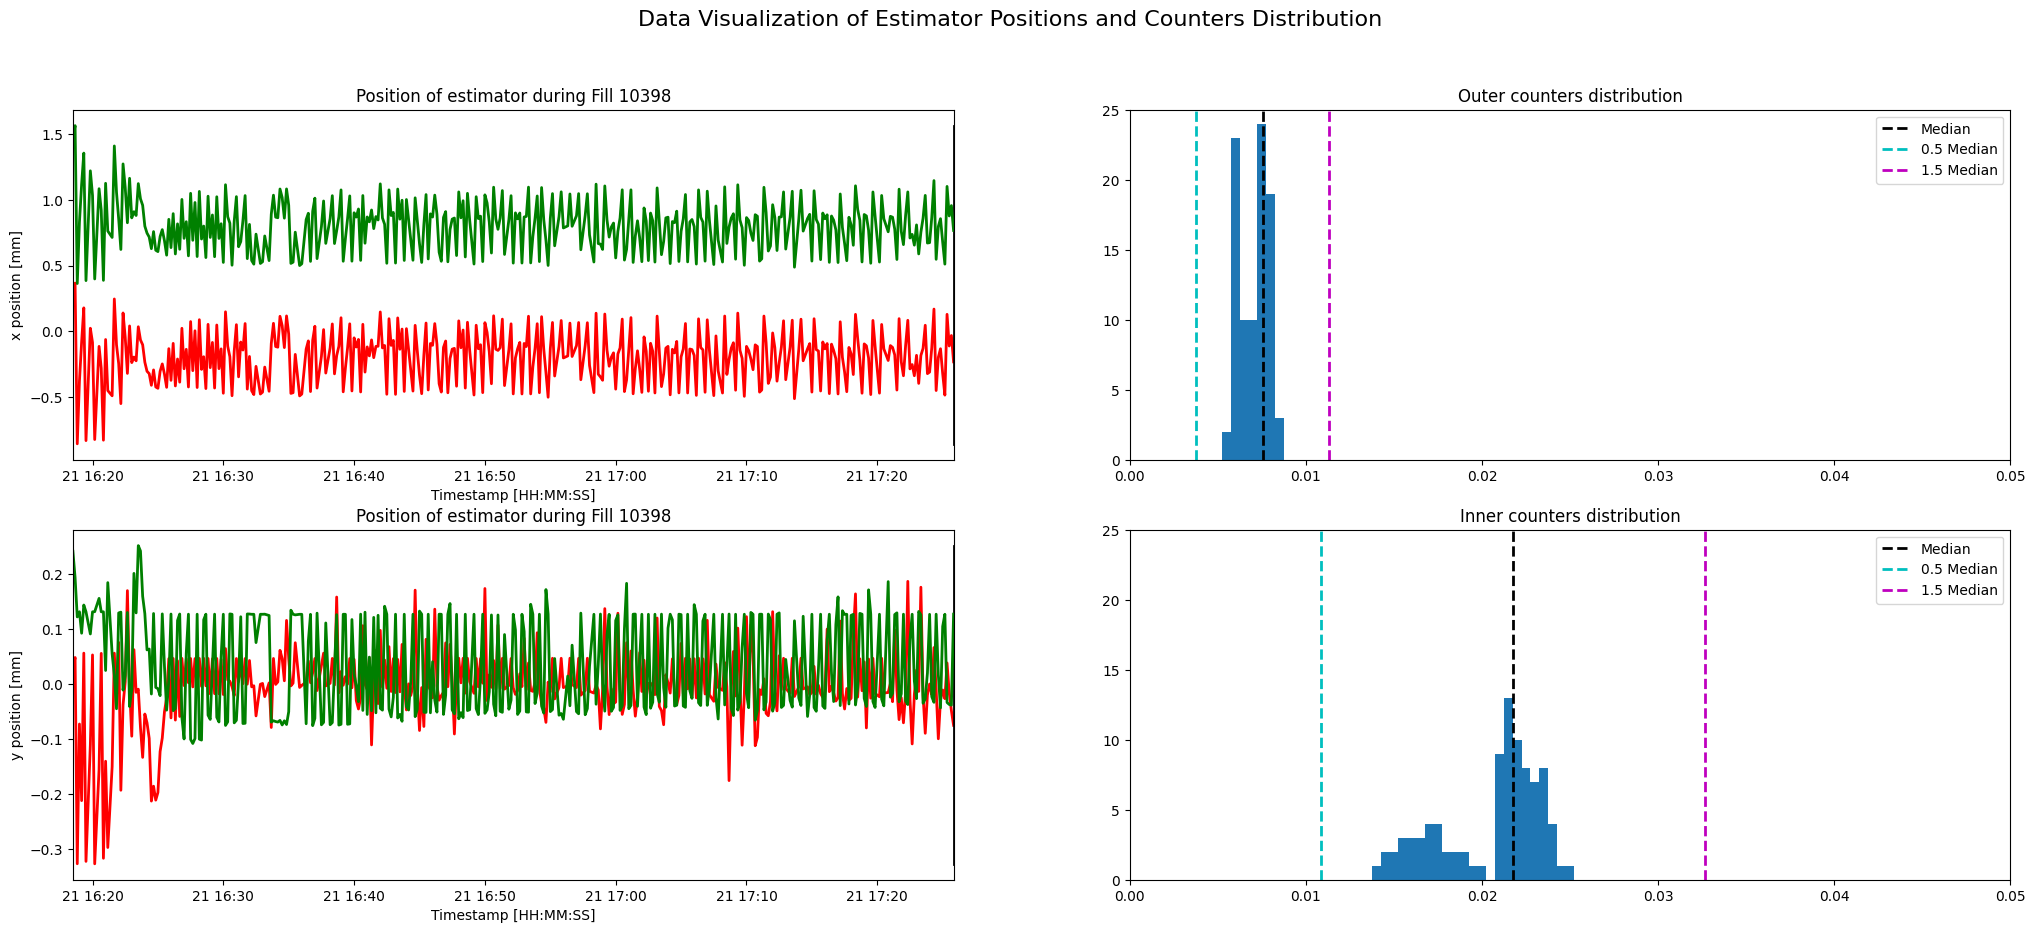

In [45]:
# Funzione per creare la GIF
def create_gif(df):
    #fig = plt.figure(figsize=(25, 10))  # Maggiore larghezza, minore altezza
    fig,axs = plt.subplots(2, 2, sharey=False,sharex=False,figsize=(25, 10))
    ax1 = axs[0,0]
    ax3 = axs[1,0]
    ax2 = axs[0,1]
    ax4 = axs[1,1]
    # Creazione delle griglie: 2 righe e 2 colonne
    #gs = fig.add_gridspec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

    # Grafico a sinistra - primo plot (posizione_x)
    #ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_xlim(df.index[0], df.index[-1])
    ax1.set_xlabel('Timestamp [HH:MM:SS]')
    ax1.set_ylabel('x position [mm]')
    pos_line_total_x, = ax1.plot(df.index, df['xVeloA'], color='r', lw=2, label='VELO A')
    current_time_line_x, = ax1.plot([], [], 'black', lw=2)
    #x5 = fig.add_subplot(gs[0, 0])
    #x5.set_xlim(df.index[0], df.index[-1])
    #x5.set_xlabel('Timestamp [HH:MM:SS]')
    #x5.set_ylabel('x position [mm]')
    pos_line_total_x, = ax1.plot(df.index,df['xVeloC'],color='g', lw=2, label='VELO C')
    #current_time_line_x, = x5.plot([], [], 'g-', lw=2)


    ax1.set_title("Position of estimator during Fill 10398")  # Titolo per il grafico di posizione X
    
    # Grafico a sinistra - secondo plot (posizione_y)
    #ax3 = fig.add_subplot(gs[1, 0])
    ax3.set_xlim(df.index[0], df.index[-1])
    ax3.set_xlabel('Timestamp [HH:MM:SS]')
    ax3.set_ylabel('y position [mm]')
    pos_line_total_y, = ax3.plot(df.index, df['yVeloA'], color='r', lw=2, label='VELO A')
    current_time_line_y, = ax3.plot([], [], 'black', lw=2)
    #ax6 = fig.add_subplot(gs[1, 0])
    #ax6.set_xlim(df.index[0], df.index[-1])
    #ax6.set_xlabel('Timestamp [HH:MM:SS]')
    #ax6.set_ylabel('y position [mm]')
    pos_line_total_y, = ax3.plot(df.index,df['yVeloC'],color='g', lw=2, label='VELO C')
    
    ax3.set_title("Position of estimator during Fill 10398")  # Titolo per il grafico di posizione Y

    # Grafico a destra - istogramma (contatori esterni)
    #ax2 = fig.add_subplot(gs[0, 1])
    bins = np.arange(0, 1, 0.0005)  # Assicurati che i bin siano corretti
    bars = ax2.bar(bins[:-1], np.zeros(len(bins)-1), width=0.0005)
    ax2.set_xlim(0, 0.05)
    ax2.set_ylim(0, 25)  # Altezza ridotta per un aspetto più quadrato
    ax2.set_title("Outer counters distribution")  # Titolo dell'istogramma

    # Linee verticali per la mediana e le altre
    median_line, = ax2.plot([], [], 'k--', lw=2, label='Median')
    half_median_line, = ax2.plot([], [], 'c--', lw=2, label='0.5 Median')
    onehalf_median_line, = ax2.plot([], [], 'm--', lw=2, label='1.5 Median')
    ax2.legend(loc='upper right')

    # Grafico a destra - istogramma (contatori interni)
    #ax4 = fig.add_subplot(gs[1, 1])
    bins_4 = np.arange(0, 1, 0.0005)  # Assicurati che i bin siano corretti
    bars_4 = ax4.bar(bins_4[:-1], np.zeros(len(bins_4)-1), width=0.0005)
    ax4.set_xlim(0, 0.05)
    ax4.set_ylim(0, 25)  # Altezza ridotta per un aspetto più quadrato
    ax4.set_title("Inner counters distribution")  # Titolo dell'istogramma

    # Linee verticali per la mediana e le altre
    median_line_4, = ax4.plot([], [], 'k--', lw=2, label='Median')
    half_median_line_4, = ax4.plot([], [], 'c--', lw=2, label='0.5 Median')
    onehalf_median_line_4, = ax4.plot([], [], 'm--', lw=2, label='1.5 Median')
    ax4.legend(loc='upper right')

    # Titolo generale
    fig.suptitle("Data Visualization of Estimator Positions and Counters Distribution", fontsize=16)

    def init():
        current_time_line_x.set_data([], [])
        current_time_line_y.set_data([], [])
        for bar in bars:
            bar.set_height(0)
        for bar in bars_4:
            bar.set_height(0)
        median_line.set_data([], [])
        half_median_line.set_data([], [])
        onehalf_median_line.set_data([], [])
        median_line_4.set_data([], [])
        half_median_line_4.set_data([], [])
        onehalf_median_line_4.set_data([], [])
        return current_time_line_x, current_time_line_y, bars, bars_4, median_line, half_median_line, onehalf_median_line, median_line_4, half_median_line_4, onehalf_median_line_4

    def update(frame):
        # Aggiorniamo la linea rossa (posizione corrente)
        current_time = df.index[frame]
        current_time_line_x.set_data([current_time, current_time], [min(df['xVeloA'].min(),df['xVeloC'].min()), max(df['xVeloA'].max(),df['xVeloC'].max())])
        current_time_line_y.set_data([current_time, current_time], [min(df['yVeloA'].min(),df['yVeloC'].min()), max(df['yVeloA'].max(),df['yVeloC'].max())])
        
        # Aggiorniamo l'istogramma (esterni)
        contatori_esterni = df.iloc[frame, 2:]  # Assicurati di prendere i contatori esterni
        heights_esterni, _ = np.histogram(contatori_esterni[contatori_esterni.index.str.endswith('outer')], bins=bins)
        for bar, height in zip(bars, heights_esterni):
            bar.set_height(height)

        # Calcoliamo la mediana e le linee di riferimento
        mediana = np.median(contatori_esterni[contatori_esterni.index.str.endswith('outer')])
        half_mediana = 0.5 * mediana
        onehalf_mediana = 1.5 * mediana
        
        # Linee verticali (mediana, 0.5 mediana, 1.5 mediana)
        median_line.set_data([mediana, mediana], [0, 25])
        half_median_line.set_data([half_mediana, half_mediana], [0, 25])
        onehalf_median_line.set_data([onehalf_mediana, onehalf_mediana], [0, 25])

        # Aggiorniamo l'istogramma (interni)
        contatori_interni = df.iloc[frame, 2:]  # Assicurati di prendere i contatori interni
        heights_interni, _ = np.histogram(contatori_interni[contatori_interni.index.str.endswith('inner')], bins=bins_4)
        for bar, height in zip(bars_4, heights_interni):
            bar.set_height(height)

        # Calcoliamo la mediana e le linee di riferimento
        median_line_4_value = np.median(contatori_interni[contatori_interni.index.str.endswith('inner')])
        half_median_line_4_value = 0.5 * median_line_4_value
        onehalf_median_line_4_value = 1.5 * median_line_4_value
        
        # Linee verticali (mediana, 0.5 mediana, 1.5 mediana)
        median_line_4.set_data([median_line_4_value, median_line_4_value], [0, 25])
        half_median_line_4.set_data([half_median_line_4_value, half_median_line_4_value], [0, 25])
        onehalf_median_line_4.set_data([onehalf_median_line_4_value, onehalf_median_line_4_value], [0, 25])

        return current_time_line_x, current_time_line_y, bars, bars_4, median_line, half_median_line, onehalf_median_line, median_line_4, half_median_line_4, onehalf_median_line_4

    ani = FuncAnimation(fig, update, frames=len(df), init_func=init, repeat=False)
    
    # Salvare la GIF
    ani.save('position_distribution_10398.gif', writer=PillowWriter(fps=300))
    
    plt.show()

# Chiamata alla funzione
create_gif(df)
